In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [8]:
visa_df=pd.read_csv(r"C:\Users\HP\Documents\Naresh It\Data files\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Select the numerical columns**

In [7]:
visa_df.select_dtypes(exclude='object')

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


In [10]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**prevailing wage**

- len

- max

- min

- mean

- median

- std

- 75%

- 50%

- 25%

**Count or len**

In [13]:
len(visa_df['prevailing_wage'])

25480

**max**

In [14]:
max(visa_df['prevailing_wage'])     # keyword

319210.27

In [15]:
visa_df['prevailing_wage'].max()    # Pandas

319210.27

In [16]:
np.max(visa_df['prevailing_wage'])   # numpy

319210.27

**min**

In [17]:
min(visa_df['prevailing_wage'])

2.1367

In [18]:
visa_df['prevailing_wage'].max()

319210.27

In [19]:
np.max(visa_df['prevailing_wage'])

319210.27

**mean**

In [22]:
visa_df['prevailing_wage'].mean()

74455.81459209183

In [23]:
np.mean(visa_df['prevailing_wage'])

74455.81459209183

**median**

In [24]:
visa_df['prevailing_wage'].median()

70308.20999999999

In [25]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

**std**

In [36]:
visa_df['prevailing_wage'].std()

52815.94232687357

In [27]:
np.std(visa_df['prevailing_wage'])

52814.90589711402

**Mode is not good option because it is numerical value**

In [11]:
# ALL together
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
# create a data frame
list_values=[wage_count,wage_min,wage_max,wage_mean,wage_median,wage_std]
index_value=["Count",'min','max','mean', 'median', 'std']
pd.DataFrame(list_values,columns=['prevailing_wage'],index=index_value)

,prevailing_wage
Count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94


**Percentile and quantile**

- Percentile:

    - np.percentile()

    - It will take two arguments

            - data: a

            - percentile: q the values varies from 0 to 100.

            - if you want to give 50P data q=50

- Quantile:

    - np.quantile()

    - It will take two arguments

            - data: a

            - quantile: q the values varies from 0 to 1.

            - if you want to give 50P data q=0.5

**25p-50p-75p**

In [12]:
wage_25p=round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(visa_df['prevailing_wage'],75),2)
print(f"The 25% data is {wage_25p}")
print(f"The 50% data is {wage_50p}")
print(f"The 75% data is {wage_75p}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


In [13]:
wage_25p=round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p=round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75p=round(np.quantile(visa_df['prevailing_wage'],0.75),2)
print(f"The 25% data is {wage_25p}")
print(f"The 50% data is {wage_50p}")
print(f"The 75% data is {wage_75p}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


**Understand the percentiles**

- definition of 25percentile

     - there are 25% of employees has salary less than 34015

     - total employees=25480

     - 25% of employees=25*25480/100=6370

     - 6370 employees have salry less than 34015

In [14]:
con=visa_df['prevailing_wage']<34015
len(visa_df[con])

6370

In [44]:
con=visa_df['prevailing_wage']<wage_25p
len(visa_df[con])

6370

In [45]:
con=visa_df['prevailing_wage']<wage_50p
len(visa_df[con])

# 50*25480/100

12740

In [46]:
con=visa_df['prevailing_wage']<wage_75p
len(visa_df[con])

19110

In [ ]:
**Emperical rule (68-95-99.7)**

  

- First calculate mean value

- second calculate std value

- Con1: mean-1*std

- Con2: mean+1*std

- If you apply above conditions on wage data, the ouput count should be equal to 68percentile data

- 68% of total employees

In [15]:
v1=wage_mean-1*wage_std
v2=wage_mean+1*wage_std
v1,v2
con1=visa_df['prevailing_wage']>v1
con2=visa_df['prevailing_wage']<v2

count1=len(visa_df[con1 & con2])
###########################################################
count1,68*25480/100
v1,v2

(21639.869999999995, 127271.75)

In [16]:
# ALL together
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
##############################################################
wage_25p=round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p=round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75p=round(np.quantile(visa_df['prevailing_wage'],0.75),2)
####################################################################
list_values=[wage_count,wage_min,wage_max,wage_mean,wage_median,wage_std,wage_25p,wage_50p,wage_75p]
index_value=["Count",'min','max','mean', 'median', 'std','25%','50%','75%']
pd.DataFrame(list_values,
             columns=['prevailing_wage'],
             index=index_value)

,prevailing_wage
Count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


**No of employees**

In [17]:
# ALL together
l1=[]
cols=['no_of_employees', 'yr_of_estab', 'prevailing_wage']
for i in cols:
        countt=round(len(visa_df[i]),2)
        minn=round(visa_df[i].min(),2)
        maxx=round(visa_df[i].max(),2)
        meann=round(visa_df[i].mean(),2)
        mediann=round(visa_df[i].median(),2)
        stdd=round(visa_df[i].std(),2)
        ##############################################################
        p_25=round(np.quantile(visa_df[i],0.25),2)
        p_50=round(np.quantile(visa_df[i],0.50),2)
        p_75=round(np.quantile(visa_df[i],0.75),2)
        ####################################################################
        l1.append([countt,minn,maxx,meann,mediann,stdd,p_25,p_50,p_75])
l1
index_value=["Count",'min','max','mean', 'median', 'std','25%','50%','75%']
df=pd.DataFrame(l1,columns=index_value,index=cols).T
df

,no_of_employees,yr_of_estab,prevailing_wage
Count,25480.00,25480.00,25480.00
min,-26.00,1800.00,2.14
max,602069.00,2016.00,319210.27
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
std,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


In [ ]:
 # Whatever we did till now
# will increase our python skill

**Describe**

- It is for only numerical data

In [18]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

- Histogram can get by matplotlib

- Histogram can get by seaborn also

- plt.hist()

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

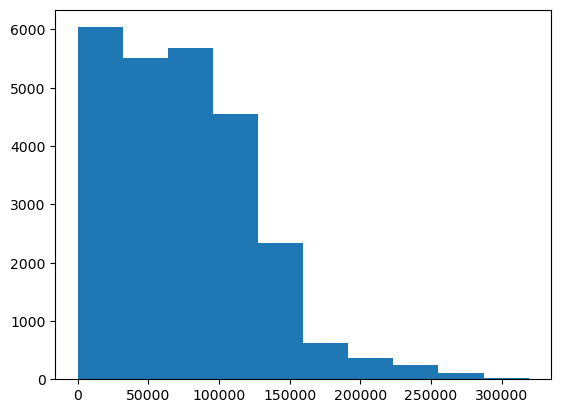

In [19]:
import matplotlib.pyplot as plt
plt.hist(visa_df['prevailing_wage'])

from interval range
- 2.13670000e+00 to 3.19229500e+04

    - 6038 members have salary between above range

- 3.19229500e+04 to 6.38437634e+04

    - 5504 members have salary between above range

- Histogram will give 3 outputs-

     - frequency

         - in each interval range how many observations are there

     - interval

         - interval range

     - number of intervals

**Check point-1**

In [20]:
2.13670000e+00, 3.19229500e+04

(2.1367, 31922.95)

In [21]:
con1=visa_df['prevailing_wage']>2.1367
con2=visa_df['prevailing_wage']<31922.95
len(visa_df[con1&con2])

6037

**Bins**

<BarContainer object of 40 artists>


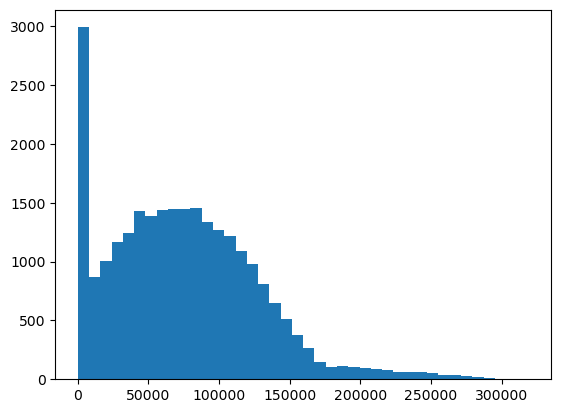

In [22]:
import matplotlib.pyplot as plt
f,i,n=plt.hist(visa_df['prevailing_wage'],bins=40)
print(n)

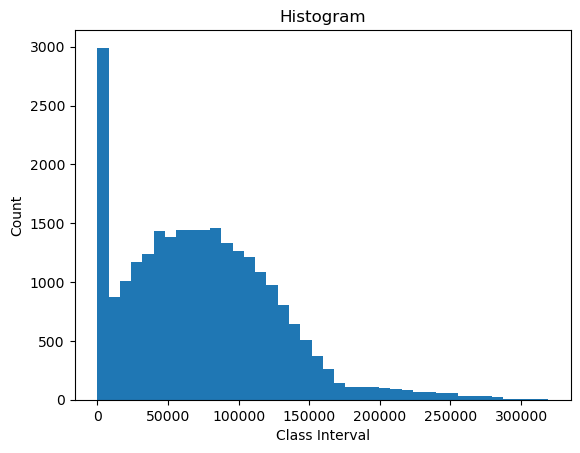

In [23]:
import matplotlib.pyplot as plt
f,i,n=plt.hist(visa_df['prevailing_wage'],bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")
plt.show()

In [84]:
cols

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Text(0, 0.5, 'Count')

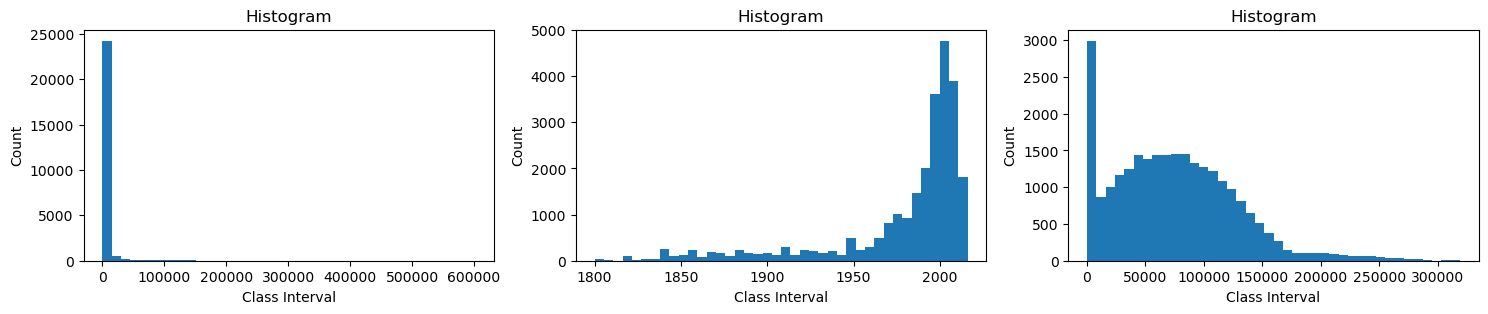

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.hist(visa_df['no_of_employees'],bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(visa_df['yr_of_estab'],bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count")

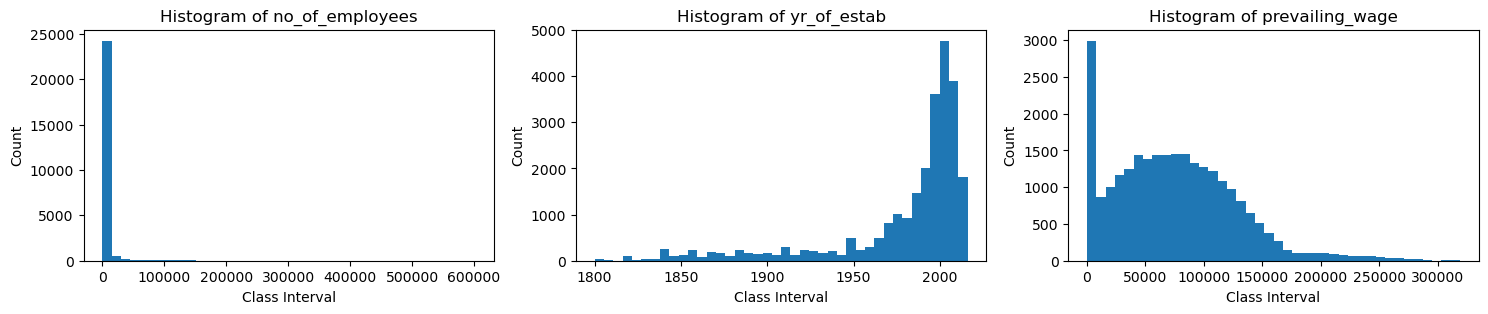

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
for i in range(len(cols)):
   plt.subplot(1,len(cols),i+1)
   plt.hist(visa_df[cols[i]],bins=40)
   plt.title(f"Histogram of {cols[i]}")
   plt.xlabel("Class Interval")
   plt.ylabel("Count")

**Histogram using seaborn**

- histplot

- distplot

In [26]:
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Count'>

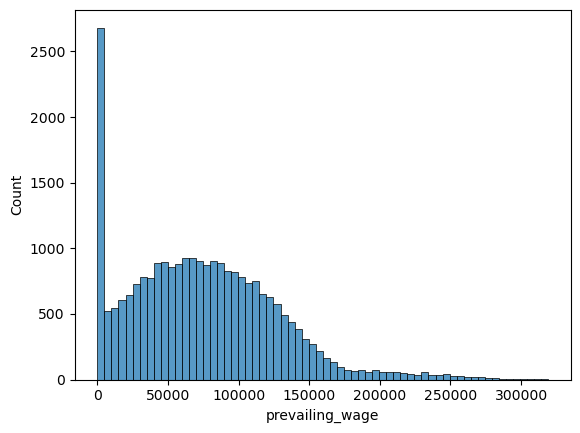

In [28]:
sns.histplot(visa_df['prevailing_wage'])

<Axes: xlabel='prevailing_wage', ylabel='Density'>

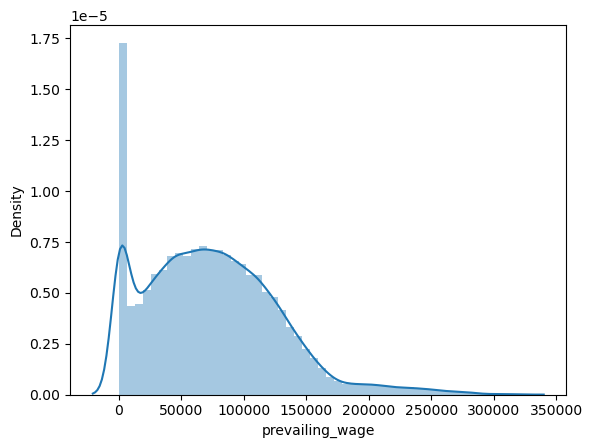

In [31]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(visa_df['prevailing_wage'])